In [51]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imread
from PIL import Image
%matplotlib inline

In [52]:
with open('./im2latex_train.lst','rb') as file:
    match = file.readlines()

In [53]:
match[0].decode('utf-8').split(' ')

['1', '60ee748793', 'basic\n']

In [54]:
N = len(match)
print ("Number of data: ",N )

Number of data:  83884


**5000 train, 1000 test**

In [55]:
train_match_dict = {e.decode('utf-8').split(' ')[0] + '.png':e.decode('utf-8').split(' ')[1] + '.png' for e in match[:5000]}

In [56]:
test_match_dict = {e.decode('utf-8').split(' ')[0] + '.png':e.decode('utf-8').split(' ')[1] + '.png' for e in match[5000:6000]}

In [57]:
len(train_match_dict.items())

5000

### Resize (using all 83884 data)

**It is a Grey scale picture = RGB 3 channel the same**

In [30]:
img = imread('./IM2LATEX-100K-HANDWRITTEN/images/' + '81680.png')

In [31]:
np.unique(img)

array([  0,   1,   2,   3,   5,   7,   8,   9,  10,  11,  12,  13,  14,
        17,  18,  21,  22,  24,  25,  26,  27,  28,  29,  30,  32,  36,
        37,  38,  40,  41,  44,  45,  47,  49,  50,  51,  52,  53,  54,
        55,  57,  59,  60,  62,  64,  66,  67,  68,  70,  71,  74,  75,
        76,  78,  79,  80,  83,  84,  85,  88,  89,  91,  92,  94,  97,
        98, 102, 103, 104, 106, 108, 109, 110, 112, 113, 114, 115, 116,
       119, 121, 122, 123, 124, 126, 127, 132, 134, 135, 136, 137, 138,
       139, 142, 143, 144, 147, 148, 149, 150, 153, 154, 155, 157, 158,
       159, 160, 163, 164, 165, 169, 170, 171, 173, 174, 176, 177, 179,
       180, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194,
       196, 197, 199, 200, 201, 202, 204, 205, 207, 208, 209, 211, 212,
       213, 214, 215, 217, 218, 220, 221, 222, 223, 224, 226, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 25

**trim the white border and resize**

In [58]:
from PIL import Image, ImageChops

def trim(im):

    bg = Image.new(im.mode, im.size, (255,255,255))
    diff = ImageChops.difference(im, bg)
#     diff = ImageChops.add(diff, diff, 2, 0)
    bbox = diff.getbbox()
    if bbox:
        return np.array(im.crop(bbox))

**Max Size**

In [9]:
def max_size(train_match_dict):
    '''
    return max size after trimming the images
    
    '''
    
    #max size after trim
    width_arr, height_arr = [], []
    
    for hw in train_match_dict.keys():
        
        #load matched filenames
        pr = train_match_dict[hw]
        
        #some may not have corresponding images
        try:
            #print
            print_img = Image.open('./formula_images_processed/'+pr)
            print_img_trim = trim(print_img)

            #handwritten
            hw_img = Image.open('./IM2LATEX-100K-HANDWRITTEN/images/'+hw)
            hw_img_trim = trim(hw_img)

            width_arr.append(print_img_trim.shape[1])
            width_arr.append(hw_img_trim.shape[1])
            
            height_arr.append(print_img_trim.shape[0])
            height_arr.append(hw_img_trim.shape[0])
#             #update max size
#             max_width = max([max_width,print_img_trim.shape[1], hw_img_trim.shape[1]])
#             max_height = max([max_height,print_img_trim.shape[0], hw_img_trim.shape[0]])
        except:
            pass
    
    return width_arr, height_arr

In [249]:
width_arr, height_arr = max_size(train_match_dict)

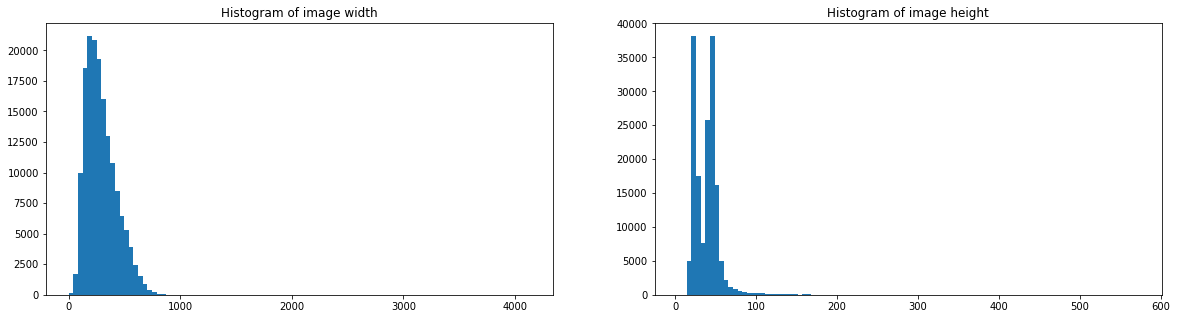

In [256]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].hist(width_arr,bins = 100)
ax[0].set_title("Histogram of image width")
ax[1].hist(height_arr,bins = 100)
ax[1].set_title("Histogram of image height")
plt.show()

In [246]:
print (max_width, max_height)

4135 573


**pad images**

In [59]:
def pad_img(max_width, max_height, img):
    height, width = img.shape[0], img.shape[1]
    height_diff, width_diff = max_height - height, max_width - width
    npad = ((int(height_diff/2), height_diff - int(height_diff/2) ), (int(width_diff/2), width_diff - int(width_diff/2) ), (0, 0))
    img_padded = np.lib.pad(img, npad, 'constant', constant_values=255)
    return img_padded

In [60]:
def print_random(train_match_dict, max_width, max_height):
    
    #load matched filenames
    rand_ind = np.random.randint(0,len(train_match_dict.items()))
    hw = list(train_match_dict.keys())[rand_ind]
    pr = train_match_dict[hw]
    
    try:
        #print
        print_img = Image.open('./formula_images_processed/'+pr)
        print_img_trim = trim(print_img)
        print_img_pad = pad_img(max_width, max_height, print_img_trim)

        #handwritten
        hw_img = Image.open('./IM2LATEX-100K-HANDWRITTEN/images/'+hw)
        hw_img_trim = trim(hw_img)
        hw_img_pad = pad_img(max_width, max_height, hw_img_trim)
        
        #plot
        fig,ax = plt.subplots(3,2,figsize = (20,15))
        ax[0,0].imshow(hw_img)
        ax[0,1].imshow(print_img)
        ax[1,0].imshow(hw_img_trim)
        ax[1,1].imshow(print_img_trim)
        ax[2,0].imshow(hw_img_pad)
        ax[2,1].imshow(print_img_pad)
        
        print (hw,pr)
        return hw_img_trim
    except:
        print ("Image size exceed max size")
    
    

4373.png 4b868688b1.png


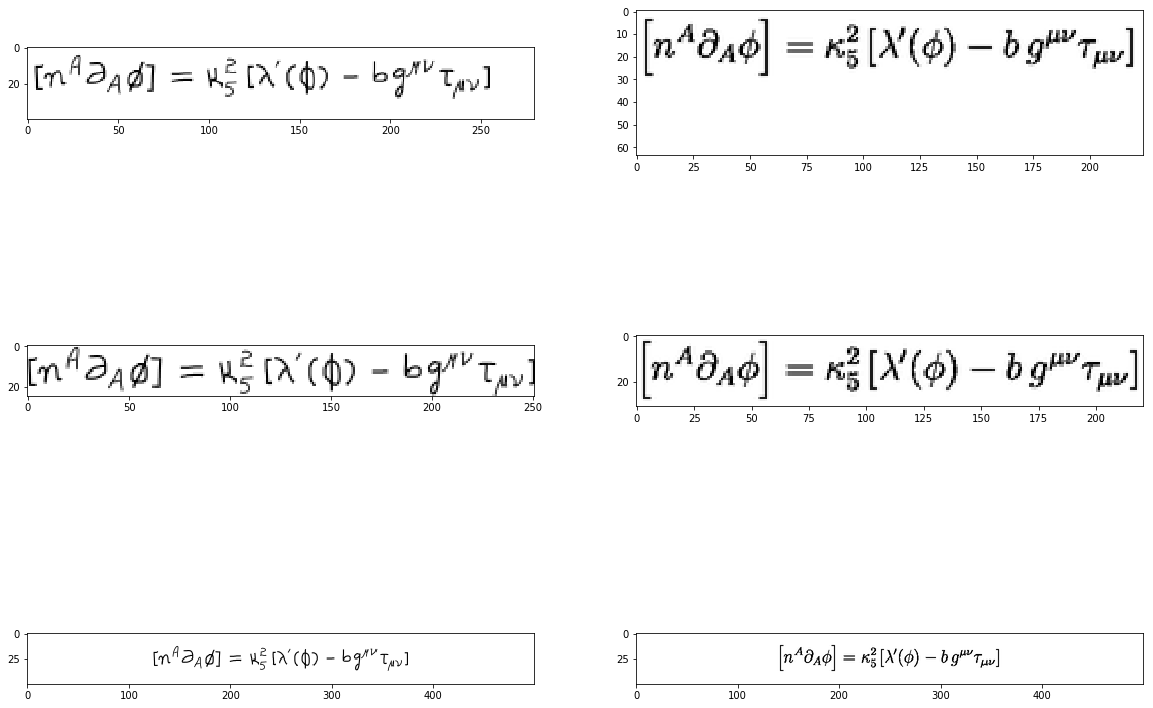

In [61]:
test = print_random(train_match_dict, 500,50)

###  Create train data (using 11000 data from train data)

In [62]:
def trim_pad(train_match_dict, max_width, max_height):
    
    hw_imgs, print_imgs = [], []
    for i,hw in enumerate(list(train_match_dict.keys())):
        
        if i%1000 == 0:
            print ("load ",i," data")
        
        #load matched filenames
        pr = train_match_dict[hw]
        
        try:
            #print
            print_img = Image.open('./formula_images_processed/'+pr)
            print_img_trim = trim(print_img)
            print_img_pad = pad_img(max_width, max_height, print_img_trim)

            #handwritten
            hw_img = Image.open('./IM2LATEX-100K-HANDWRITTEN/images/'+hw)
            hw_img_trim = trim(hw_img)
            hw_img_pad = pad_img(max_width, max_height, hw_img_trim)
            
            #append the first channel : they are the same
            print_imgs.append(print_img_pad[:,:,0])
            hw_imgs.append(hw_img_pad[:,:,0])

        except:
            #image size exceed max size
            pass
        
        
        
        
    return print_imgs, hw_imgs

In [63]:
max_width, max_height = 300, 50

In [64]:
print_imgs, hw_imgs = trim_pad(train_match_dict, max_width, max_height)

load  0  data
load  1000  data
load  2000  data
load  3000  data
load  4000  data


In [65]:
len(print_imgs), len(hw_imgs)

(2192, 2192)

In [66]:
import torch
import torch.utils.data as data_utils
from torch.autograd import Variable

**array of 2d to 3d**

In [117]:
print_imgs = np.array(print_imgs, dtype = 'float')
hw_imgs = np.array(hw_imgs, dtype = 'float')

In [118]:
print_imgs_3d = np.concatenate([arr[np.newaxis] for arr in print_imgs])
print_imgs_3d = np.expand_dims(print_imgs_3d, axis=1)
print_imgs_3d.shape

(2192, 1, 50, 300)

In [119]:
hw_imgs_3d = np.concatenate([arr[np.newaxis] for arr in hw_imgs])
hw_imgs_3d = np.expand_dims(hw_imgs_3d, axis=1)
hw_imgs_3d.shape

(2192, 1, 50, 300)

In [120]:
print_imgs_3d = print_imgs_3d[:2180,:,:,:]
hw_imgs_3d = hw_imgs_3d[:2180,:,:,:]

In [122]:
features = torch.from_numpy(hw_imgs_3d).type(torch.FloatTensor)
targets = torch.from_numpy(print_imgs_3d).type(torch.FloatTensor)

In [123]:
batch_size = 20

In [124]:
train = data_utils.TensorDataset(features, targets)
train_loader = data_utils.DataLoader(train, batch_size=batch_size, shuffle=True)

**flatten 3d out**

In [17]:
print_imgs_flat = np.array([np.ravel(img) for img in print_imgs])
print_imgs_flat.shape

(4741, 300000)

In [ ]:
hw_imgs_flat = np.array([np.ravel(img) for img in hw_imgs])
hw_imgs_flat.shape

(4741, 300000)

In [ ]:
features = torch.from_numpy(hw_imgs_flat/255)
targets = torch.from_numpy(print_imgs_flat/255)

In [ ]:
train = data_utils.TensorDataset(features, targets)
train_loader = data_utils.DataLoader(train, batch_size=100, shuffle=True)

### Train DVE

In [72]:
import torch
import torch.nn as nn
import torch.utils as utils
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [85]:
epoch = 10
# batch_size = 20
learning_rate = 0.001

In [86]:
# Encoder 
# torch.nn.Conv2d(in_channels, out_channels, kernel_size,
#                 stride=1, padding=0, dilation=1,
#                 groups=1, bias=True)
# batch x 1 x 28 x 28 -> batch x 512

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,32,3,padding=1),   # batch x 16 x max_height x max_weight
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,32,3,padding=1),   # batch x 16 x max_height x max_weight
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 32 x max_height x max_weight
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.Conv2d(64,64,3,padding=1),  # batch x 32 x max_height x max_weight
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)   # batch x 64 x max_height x max_weight / 4
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.Conv2d(128,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 64 x 7 x 7
                        nn.ReLU()
        )
        
                
    def forward(self,x):
        out = self.layer1(x)
#         print (out.size())
#         out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    
encoder = Encoder()

In [87]:
# Decoder 
# torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size,
#                          stride=1, padding=0, output_padding=0,
#                          groups=1, bias=True)
# output_height = (height-1)*stride + kernel_size - 2*padding + output_padding
# batch x 512 -> batch x 1 x 28 x 28

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,128,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.ConvTranspose2d(64,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,32,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,32,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,1,3,2,1,1),
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,64,int(max_height/2),int(max_width/2))
#         out = self.layer1(out)
        out = self.layer2(out)
        return out

decoder = Decoder()

In [88]:
# Check output of autoencoder

for image,label in train_loader:
    image = Variable(image)
    
    output = encoder(image)
    output = decoder(output)
    print(output.size())
    break

torch.Size([20, 64, 25, 150])
torch.Size([20, 1, 50, 300])


In [ ]:
# Noise 
noise = torch.rand(batch_size,1,28,28)

In [89]:
# loss func and optimizer
# we compute reconstruction after decoder so use Mean Squared Error
# In order to use multi parameters with one optimizer,
# concat parameters after changing into list

parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [90]:
# train encoder and decoder
# save and load model

# try:
#     encoder, decoder = torch.load('./model/deno_autoencoder.pkl')
#     print("\n--------model restored--------\n")
# except:
#     print("\n--------model not restored--------\n")
#     pass

for i in range(1):
    for image,label in train_loader:
  
        #label = Variable(label.float()).cuda()
        optimizer.zero_grad()
        output = encoder(Variable(image))
        output = decoder(output)
        loss = loss_func(output,Variable(label))
        loss.backward()
        optimizer.step()
              
#     torch.save([encoder,decoder],'./model/deno_autoencoder.pkl')
        print(loss)

torch.Size([20, 64, 25, 150])
Variable containing:
 62431.7656
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 62108.1250
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 62436.2578
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 62110.9570
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 61981.2188
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 61873.8281
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 62125.6562
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 62207.4961
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 61641.1680
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 62374.5039
[torch.FloatTensor of size 1]

torch.Size([20, 64, 25, 150])
Variable containing:
 61771.83

RuntimeError: invalid argument 2: size '[20 x 64 x 25 x 150]' is invalid for input of with 2880000 elements at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/THStorage.c:41

In [99]:
output[0]

Variable containing:
 1.8315e-01
 1.5006e-01
 9.1468e-02
     ⋮     
 2.8286e-01
 3.1132e-01
-1.8634e-01
[torch.FloatTensor of size 144000]

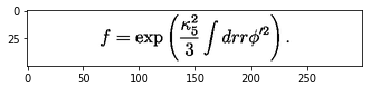

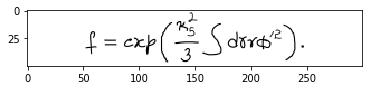

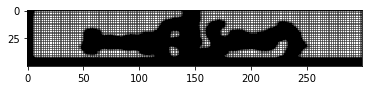

In [102]:
# check image with noise and denoised image\n# Better image if you train more or upgrade the model\n
img = label[0]
input_img = image[0]
output_img = output[0]

origin = img.numpy().astype(int)
input_img = input_img.numpy().astype(int)
output_img = output_img.data.numpy().astype(int)

plt.imshow(origin[0,:,:],cmap='gray')
plt.show()

plt.imshow(input_img[0,:,:],cmap='gray')
plt.show()

plt.imshow(output_img[0,:,:],cmap="gray")
plt.show()

# print(label[0])

In [104]:
loss_arr = []
for i in range(1):
    for image,label in train_loader:
  
        #label = Variable(label.float()).cuda()
        optimizer.zero_grad()
        output = encoder(Variable(image))
        output = decoder(output)
        loss = loss_func(output,Variable(label))
        loss.backward()
        optimizer.step()
        
                
#     torch.save([encoder,decoder],'./model/deno_autoencoder.pkl')
        print("i",loss.data.numpy()[0])
        loss_arr.append(loss.data.numpy()[0])

torch.Size([20, 64, 25, 150])
i 60366.8
torch.Size([20, 64, 25, 150])
i 60420.9
torch.Size([20, 64, 25, 150])
i 60407.8
torch.Size([20, 64, 25, 150])
i 60169.6
torch.Size([20, 64, 25, 150])
i 60469.3
torch.Size([20, 64, 25, 150])
i 60652.3
torch.Size([20, 64, 25, 150])
i 60377.9
torch.Size([20, 64, 25, 150])
i 60103.9
torch.Size([20, 64, 25, 150])
i 60128.7
torch.Size([20, 64, 25, 150])
i 60067.4
torch.Size([20, 64, 25, 150])
i 60597.1
torch.Size([20, 64, 25, 150])
i 60264.7
torch.Size([20, 64, 25, 150])
i 60143.9
torch.Size([20, 64, 25, 150])
i 59922.3
torch.Size([20, 64, 25, 150])
i 60146.0
torch.Size([20, 64, 25, 150])
i 60096.0
torch.Size([20, 64, 25, 150])
i 60094.8
torch.Size([20, 64, 25, 150])
i 60047.1
torch.Size([20, 64, 25, 150])
i 59705.5
torch.Size([20, 64, 25, 150])
i 59556.7
torch.Size([20, 64, 25, 150])
i 59872.7
torch.Size([20, 64, 25, 150])
i 59826.3
torch.Size([20, 64, 25, 150])
i 60110.8
torch.Size([20, 64, 25, 150])
i 59501.0
torch.Size([20, 64, 25, 150])
i 59525.5


RuntimeError: invalid argument 2: size '[20 x 64 x 25 x 150]' is invalid for input of with 2880000 elements at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/THStorage.c:41

In [105]:
def compare_plot(label, image, output):
    
    #start over to match batch size
    for image,label in train_loader:
  
        #label = Variable(label.float()).cuda()
        optimizer.zero_grad()
        output = encoder(Variable(image))
        output = decoder(output)
        loss = loss_func(output,Variable(label))
        loss.backward()
        optimizer.step()
        break 
        
    img = label[0]
    input_img = image[0]
    output_img = output[0]

    origin = img.numpy().astype(int)
    input_img = input_img.numpy().astype(int)
    output_img = output_img.data.numpy().astype(int)

    plt.imshow(origin[0,:,:],cmap='gray')
    plt.show()

    plt.imshow(input_img[0,:,:],cmap='gray')
    plt.show()

    plt.imshow(output_img[0,:,:],cmap="gray")
    plt.show()

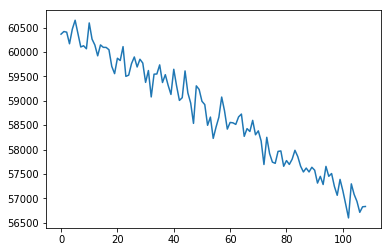

In [107]:
plt.plot(range(len(loss_arr)), loss_arr)
plt.show()

torch.Size([20, 64, 25, 150])


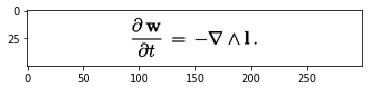

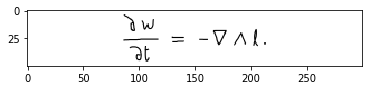

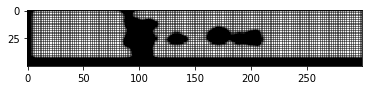

In [109]:
compare_plot(label, image, output)

In [110]:
loss_arr = []
for i in range(1):
    for image,label in train_loader:
  
        #label = Variable(label.float()).cuda()
        optimizer.zero_grad()
        output = encoder(Variable(image))
        output = decoder(output)
        loss = loss_func(output,Variable(label))
        loss.backward()
        optimizer.step()
        
                
#     torch.save([encoder,decoder],'./model/deno_autoencoder.pkl')
        print("i",loss.data.numpy()[0])
        loss_arr.append(loss.data.numpy()[0])

torch.Size([20, 64, 25, 150])
i 56499.7
torch.Size([20, 64, 25, 150])
i 56723.7
torch.Size([20, 64, 25, 150])
i 56532.1
torch.Size([20, 64, 25, 150])
i 56576.2
torch.Size([20, 64, 25, 150])
i 56150.0
torch.Size([20, 64, 25, 150])
i 56424.6
torch.Size([20, 64, 25, 150])
i 56330.5
torch.Size([20, 64, 25, 150])
i 56352.4
torch.Size([20, 64, 25, 150])
i 56225.6
torch.Size([20, 64, 25, 150])
i 56564.8
torch.Size([20, 64, 25, 150])
i 56210.3
torch.Size([20, 64, 25, 150])
i 55858.0
torch.Size([20, 64, 25, 150])
i 55990.2
torch.Size([20, 64, 25, 150])
i 56001.4
torch.Size([20, 64, 25, 150])
i 56142.5
torch.Size([20, 64, 25, 150])
i 56367.4
torch.Size([20, 64, 25, 150])
i 56355.5
torch.Size([20, 64, 25, 150])
i 55849.9
torch.Size([20, 64, 25, 150])
i 55587.5
torch.Size([20, 64, 25, 150])
i 55720.9
torch.Size([20, 64, 25, 150])
i 55819.3
torch.Size([20, 64, 25, 150])
i 55675.5
torch.Size([20, 64, 25, 150])
i 55790.8
torch.Size([20, 64, 25, 150])
i 55490.2
torch.Size([20, 64, 25, 150])
i 55465.7


RuntimeError: invalid argument 2: size '[20 x 64 x 25 x 150]' is invalid for input of with 2880000 elements at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/THStorage.c:41

torch.Size([20, 64, 25, 150])


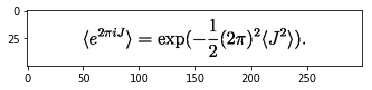

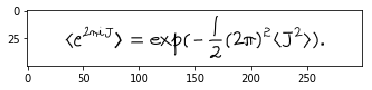

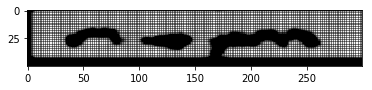

In [111]:
compare_plot(label, image, output)

In [125]:
loss_arr = []
for i in range(10):
    for image,label in train_loader:
  
        #label = Variable(label.float()).cuda()
        optimizer.zero_grad()
        output = encoder(Variable(image))
        output = decoder(output)
        loss = loss_func(output,Variable(label))
        loss.backward()
        optimizer.step()    
                
#     torch.save([encoder,decoder],'./model/deno_autoencoder.pkl')
        print("i",loss.data.numpy()[0])
        loss_arr.append(loss.data.numpy()[0])

torch.Size([20, 64, 25, 150])
i 51230.4
torch.Size([20, 64, 25, 150])
i 51218.5
torch.Size([20, 64, 25, 150])
i 51040.4
torch.Size([20, 64, 25, 150])
i 51004.5
torch.Size([20, 64, 25, 150])
i 51056.5
torch.Size([20, 64, 25, 150])
i 50947.5
torch.Size([20, 64, 25, 150])
i 50751.3
torch.Size([20, 64, 25, 150])
i 50667.5
torch.Size([20, 64, 25, 150])
i 50681.9
torch.Size([20, 64, 25, 150])
i 50854.6
torch.Size([20, 64, 25, 150])
i 50469.0
torch.Size([20, 64, 25, 150])
i 50473.6
torch.Size([20, 64, 25, 150])
i 50487.7
torch.Size([20, 64, 25, 150])
i 50314.9
torch.Size([20, 64, 25, 150])
i 50027.0
torch.Size([20, 64, 25, 150])
i 50248.6
torch.Size([20, 64, 25, 150])
i 50166.8
torch.Size([20, 64, 25, 150])
i 50013.0
torch.Size([20, 64, 25, 150])
i 50282.7
torch.Size([20, 64, 25, 150])
i 50130.7
torch.Size([20, 64, 25, 150])
i 50176.8
torch.Size([20, 64, 25, 150])
i 49878.4
torch.Size([20, 64, 25, 150])
i 49922.3
torch.Size([20, 64, 25, 150])
i 49666.1
torch.Size([20, 64, 25, 150])
i 49810.9


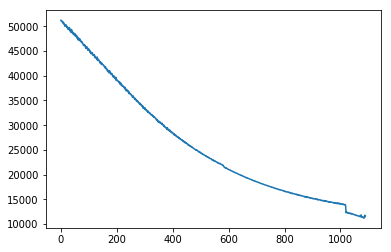

In [126]:
plt.plot(range(len(loss_arr)), loss_arr)
plt.show()

torch.Size([20, 64, 25, 150])


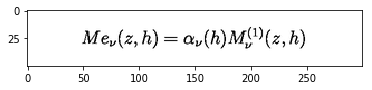

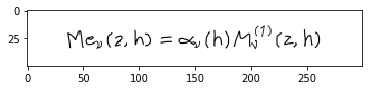

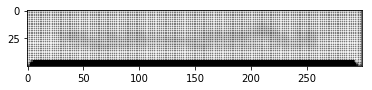

In [129]:
compare_plot(label, image, output)

### Train VAE

In [22]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.autograd import Variable
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [23]:
batch_size = 100
epochs = 10
log_interval = 10

In [24]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(1000*300, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 1000*300)
        
        #convolution
#         self.fc1 = nn.Conv3d(3,10,3)
#         self.fc21 = nn.Conv3d(10,15,3)
#         self.fc22 = nn.Linear(400, 20)
#         self.fc3 = nn.Linear(20, 400)
#         self.fc4 = nn.Linear(400, 1000*100)
        #linear
#         self.fc1 = nn.Linear(1000*100, 400)
#         self.fc21 = nn.Linear(400, 20)
#         self.fc22 = nn.Linear(400, 20)
#         self.fc3 = nn.Linear(20, 400)
#         self.fc4 = nn.Linear(400, 1000*100)

        self.relu = nn.ReLU()
#         self.maxpool = nn.MaxPool3d((2, 2, 2))
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 1000*300))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [25]:
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 1000*300))

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    # Normalise by same number of elements as in reconstruction
    KLD /= batch_size * 1000*300

    return BCE + KLD

In [26]:
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data.type(torch.FloatTensor))
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.data[0]
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.data[0] / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    for i, (data, _) in enumerate(test_loader):
        data = Variable(data.type(torch.FloatTensor), volatile=True)
        recon_batch, mu, logvar = model(data)
        test_loss += loss_function(recon_batch, data, mu, logvar).data[0]
        if i == 0:
            n = min(data.size(0), 8)
            comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
            save_image(comparison.data.cpu(),
                     'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [27]:
model = VAE()

In [28]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [29]:
for epoch in range(1, epochs + 1):
    train(epoch)
#     test(epoch)
#     sample = Variable(torch.randn(64, 20))
#     sample = model.decode(sample).cpu()
#     save_image(sample.data.view(64, 1, 28, 28),
#                'results/sample_' + str(epoch) + '.png')

Train Epoch: 1 [0/4741 (0%)]	Loss: inf


KeyboardInterrupt: 